<a href="https://colab.research.google.com/github/eyad3anan/Data-mining/blob/main/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import plotly.express as px
import scipy as sp
from scipy import ndimage
from shutil import copyfile
from tensorflow.keras.layers import Conv2D, Add, MaxPooling2D, Dense, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [ ]:
current_working_directory = os.getcwd()
print(current_working_directory)
print(os.listdir(current_working_directory))

/content
['.config', 'microsoft-catsvsdogs-dataset', 'sample_data']


In [ ]:
class_names = ['Cat', 'Dog']

n_dogs = len(os.listdir('/content/microsoft-catsvsdogs-dataset/PetImages/Dog'))
n_cats = len(os.listdir('/content/microsoft-catsvsdogs-dataset/PetImages/Cat'))
n_images = [n_cats, n_dogs]
px.pie(names=class_names, values=n_images)

In [ ]:
try:
    os.makedirs("/content/microsoft-catsvsdogs-dataset/tmp", exist_ok=True)
    os.makedirs("/content/microsoft-catsvsdogs-dataset/tmp/training", exist_ok=True)
    os.makedirs("/content/microsoft-catsvsdogs-dataset/tmp/validation", exist_ok=True)
    os.makedirs("/content/microsoft-catsvsdogs-dataset/tmp/test", exist_ok=True)
    os.makedirs("/content/microsoft-catsvsdogs-dataset/tmp/training/cats", exist_ok=True)
    os.makedirs("/content/microsoft-catsvsdogs-dataset/tmp/training/dogs", exist_ok=True)
    os.makedirs("/content/microsoft-catsvsdogs-dataset/tmp/validation/cats", exist_ok=True)
    os.makedirs("/content/microsoft-catsvsdogs-dataset/tmp/validation/dogs", exist_ok=True)
    os.makedirs("/content/microsoft-catsvsdogs-dataset/tmp/test/cats", exist_ok=True)
    os.makedirs("/content/microsoft-catsvsdogs-dataset/tmp/test/dogs", exist_ok=True)
except OSError:
    print(f"Failed to make the directory")

In [ ]:
CAT_DIR = "/content/microsoft-catsvsdogs-dataset/PetImages/Cat"

DOG_DIR = "/content/microsoft-catsvsdogs-dataset/PetImages/Dog" # dah el path ely feeha el images beta3t el dogs kolha


TRAINING_DIR = "/content/microsoft-catsvsdogs-dataset/tmp/training"
VALIDATION_DIR = "/content/microsoft-catsvsdogs-dataset/tmp/validation"

TRAINING_CATS = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS = os.path.join(VALIDATION_DIR, "dogs/")


INCLUDE_TEST = True

In [ ]:
print(len(os.listdir("/content/microsoft-catsvsdogs-dataset/tmp/training/cats")))
print(len(os.listdir("/content/microsoft-catsvsdogs-dataset/tmp/training/dogs")))

print(len(os.listdir("/content/microsoft-catsvsdogs-dataset/tmp/validation/cats")))
print(len(os.listdir("/content/microsoft-catsvsdogs-dataset/tmp/validation/dogs")))

print(len(os.listdir("/content/microsoft-catsvsdogs-dataset/tmp/test/cats")))
print(len(os.listdir("/content/microsoft-catsvsdogs-dataset/tmp/test/dogs")))

0
0
0
0
0
0


In [ ]:
def split_data(main_dir, training_dir, validation_dir, test_dir=None, include_test_split=True, split_size = 0.9):
    files = []
    for file in os.listdir(main_dir):
        if os.path.getsize(os.path.join(main_dir, file)):
            files.append(file)

    shuffled_indices = random.sample(files, len(files))
    split = int(0.9 * len(shuffled_indices))
    train = shuffled_indices[:split]
    split_valid_test = int(split + (len(shuffled_indices) - split)/2)

    if include_test_split:
        validation = shuffled_indices[split:split_valid_test]
        test = shuffled_indices[split_valid_test:]
    else:
        validation = shuffled_indices[split:]

    for element in train:
        copyfile(os.path.join(main_dir, element), os.path.join(training_dir, element))
    for element in validation:
        copyfile(os.path.join(main_dir, element), os.path.join(validation_dir, element))
    if include_test_split:
        for element in test:
            copyfile(os.path.join(main_dir, element), os.path.join(test_dir, element))
    print("Split sucessfully")

In [ ]:
split_data(CAT_DIR, "/content/microsoft-catsvsdogs-dataset/tmp/training/cats", "/content/microsoft-catsvsdogs-dataset/tmp/validation/cats", "/content/microsoft-catsvsdogs-dataset/tmp/test/cats", include_test_split=True, split_size=0.9)
split_data(DOG_DIR, "/content/microsoft-catsvsdogs-dataset/tmp/training/dogs", "/content/microsoft-catsvsdogs-dataset/tmp/validation/dogs", "/content/microsoft-catsvsdogs-dataset/tmp/test/dogs", include_test_split=True, split_size=0.9)


Split sucessfully
Split sucessfully


In [ ]:
print(f"The total number of the cats is {len(os.listdir('/content/microsoft-catsvsdogs-dataset/PetImages/Cat'))}")
print(f"The total number of the cats is {len(os.listdir('/content/microsoft-catsvsdogs-dataset/PetImages/Dog'))}")
print("="*100)
print(f"The number of the cat images in the training data is {len(os.listdir('/content/microsoft-catsvsdogs-dataset/tmp/training/cats'))}")
print(f"The number of the dog images in the training data is {len(os.listdir('/content/microsoft-catsvsdogs-dataset/tmp/training/dogs'))}")
print("="*100)
print(f"The number of the cat images in the validation data is {len(os.listdir('/content/microsoft-catsvsdogs-dataset/tmp/validation/cats'))}")
print(f"The number of the dog images in the validation data is {len(os.listdir('/content/microsoft-catsvsdogs-dataset/tmp/validation/dogs'))}")
print("="*100)
print(f"The number of the cat images in the test data is {len(os.listdir('/content/microsoft-catsvsdogs-dataset/tmp/test/cats'))}")
print(f"The number of the dog images in the test data is {len(os.listdir('/content/microsoft-catsvsdogs-dataset/tmp/test/dogs'))}")

The total number of the cats is 12501
The total number of the cats is 12501
The number of the cat images in the training data is 11250
The number of the dog images in the training data is 11250
The number of the cat images in the validation data is 625
The number of the dog images in the validation data is 625
The number of the cat images in the test data is 625
The number of the dog images in the test data is 625


In [ ]:
train_generator = ImageDataGenerator(rescale=1./255.)
validation_generator = ImageDataGenerator(rescale=1./255.)
if INCLUDE_TEST:
    test_generator = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_generator.flow_from_directory("/content/microsoft-catsvsdogs-dataset/tmp/training", target_size=(150, 150), batch_size=64, class_mode="binary")
validation_generator = validation_generator.flow_from_directory("/content/microsoft-catsvsdogs-dataset/tmp/validation", target_size=(150, 150), batch_size=64, class_mode="binary")

if INCLUDE_TEST:
    test_generator = test_generator.flow_from_directory("/content/microsoft-catsvsdogs-dataset/tmp/test", target_size=(150, 150), batch_size=64, class_mode="binary")

Found 22499 images belonging to 2 classes.
Found 1250 images belonging to 2 classes.
Found 1249 images belonging to 2 classes.


In [ ]:
class_names = ['Cat', 'Dog']
def plot_data(generator, n_images):
    """
    Plots random data from dataset
    Args:
    generator: a generator instance
    n_images : number of images to plot
    """
    i = 1
    images, labels = next(generator)
    labels = labels.astype('int32')
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == n_images:
            break
    plt.show()

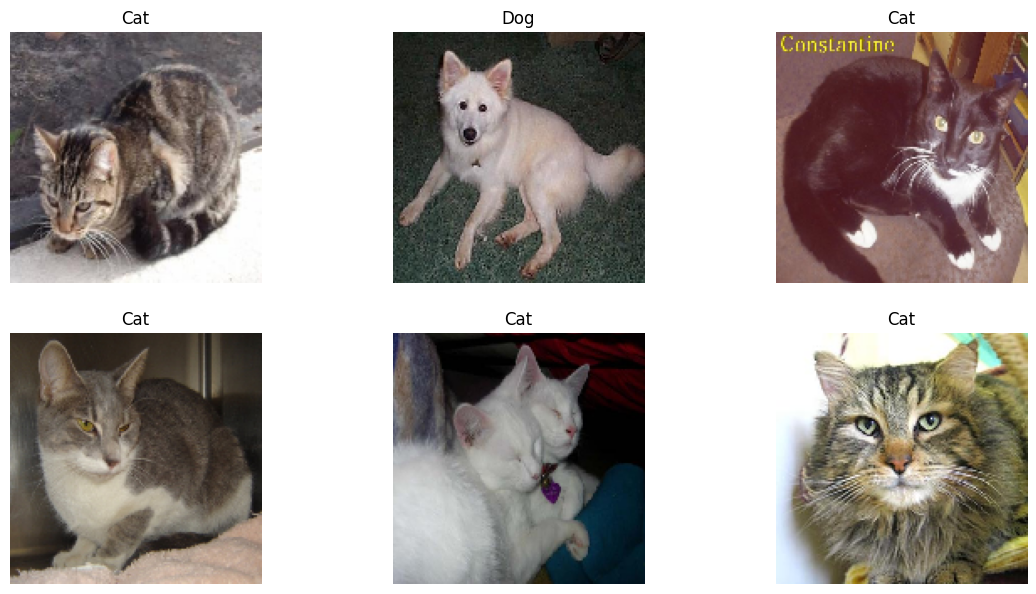

In [ ]:
plot_data(train_generator,7)

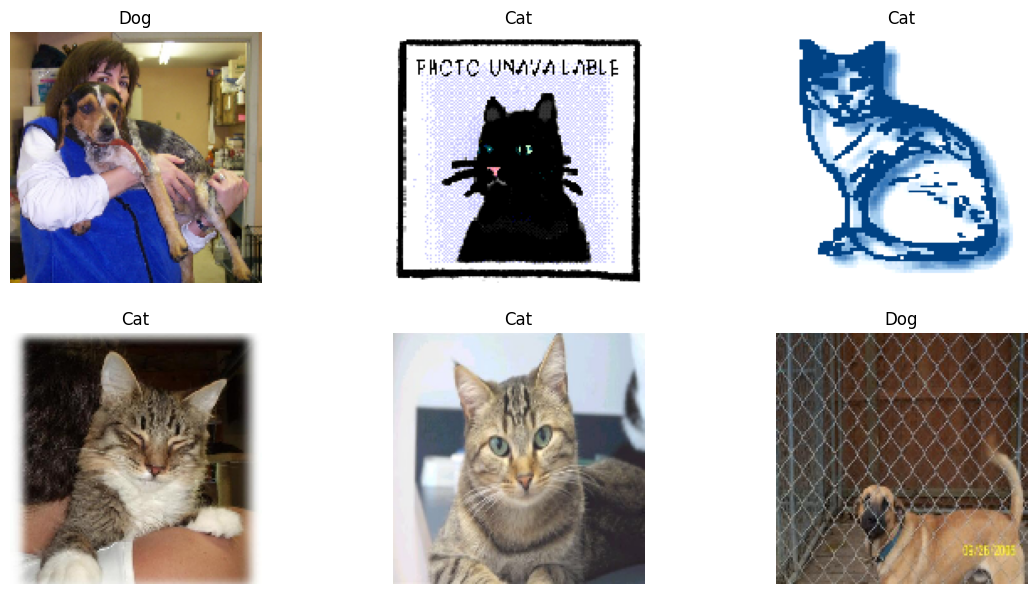

In [ ]:
plot_data(validation_generator,7)

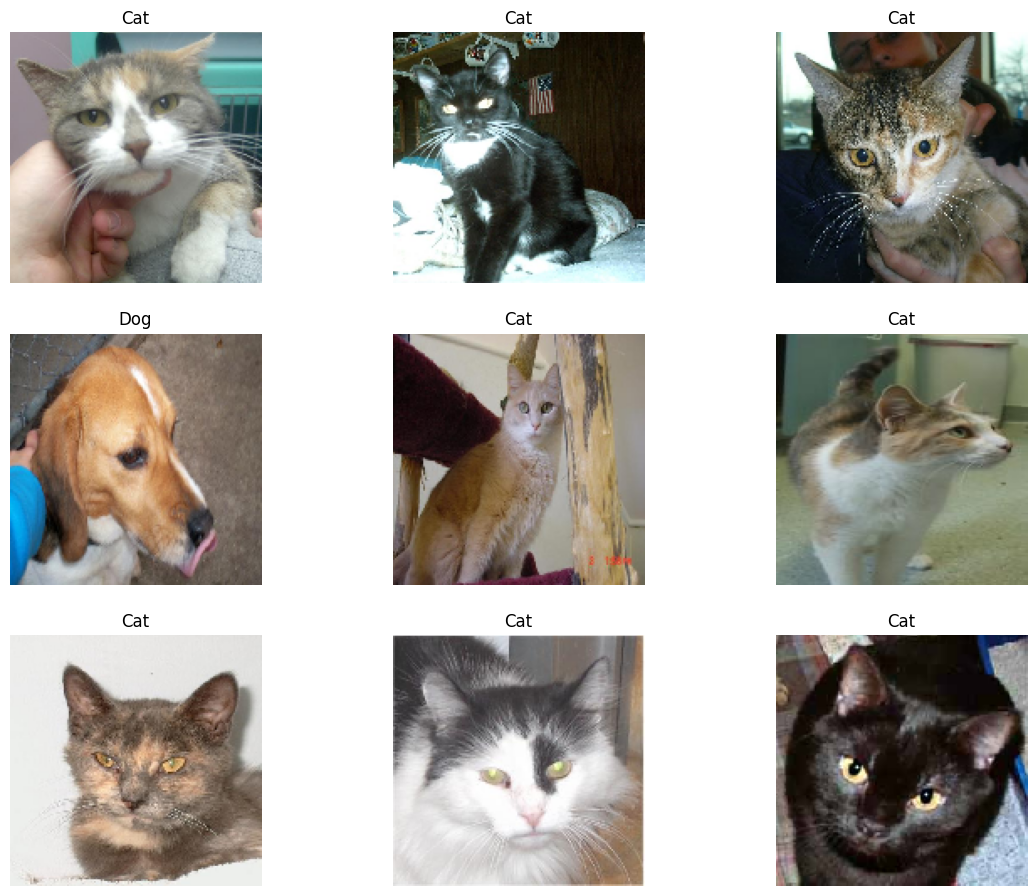

In [ ]:
if INCLUDE_TEST:
    plot_data(test_generator, 10)

In [ ]:
inputs = tf.keras.layers.Input(shape=(150,150,3))
x =  tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.Conv2D(256, (3,3), activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x)


model = Model(inputs=inputs, outputs=x)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
r = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/10
322/352 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.5136 - loss: 0.6947

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning:

Truncated File Read



352/352 ━━━━━━━━━━━━━━━━━━━━ 82s 188ms/step - accuracy: 0.5161 - loss: 0.6944 - val_accuracy: 0.6048 - val_loss: 0.6482
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.6076 - loss: 0.6590 - val_accuracy: 0.6976 - val_loss: 0.5834
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.6760 - loss: 0.6067 - val_accuracy: 0.7328 - val_loss: 0.5389
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.6988 - loss: 0.5761 - val_accuracy: 0.7520 - val_loss: 0.5039
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 51s 144ms/step - accuracy: 0.7160 - loss: 0.5615 - val_accuracy: 0.7560 - val_loss: 0.5136
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.7292 - loss: 0.5426 - val_accuracy: 0.7688 - val_loss: 0.4947
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.7412 - loss: 0.5258 - val_accuracy: 0.7696 - val_loss: 0.4841
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.7485 - loss: 0.5136 - val

### Evaluation

In [ ]:
if INCLUDE_TEST:
    model.evaluate(test_generator)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step - accuracy: 0.8041 - loss: 0.4105


### Visualize the predicitons

In [ ]:
def plot_prediction(generator, n_images):
    i = 1
    images, labels = next(generator)
    preds = model.predict(images)
    predictions = np.argmax(preds, axis=1)
    labels = labels.astype('int32')
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if predictions[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g')
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r')
            plt.axis('off')
        i += 1
        if i == n_images:
            break
    plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step


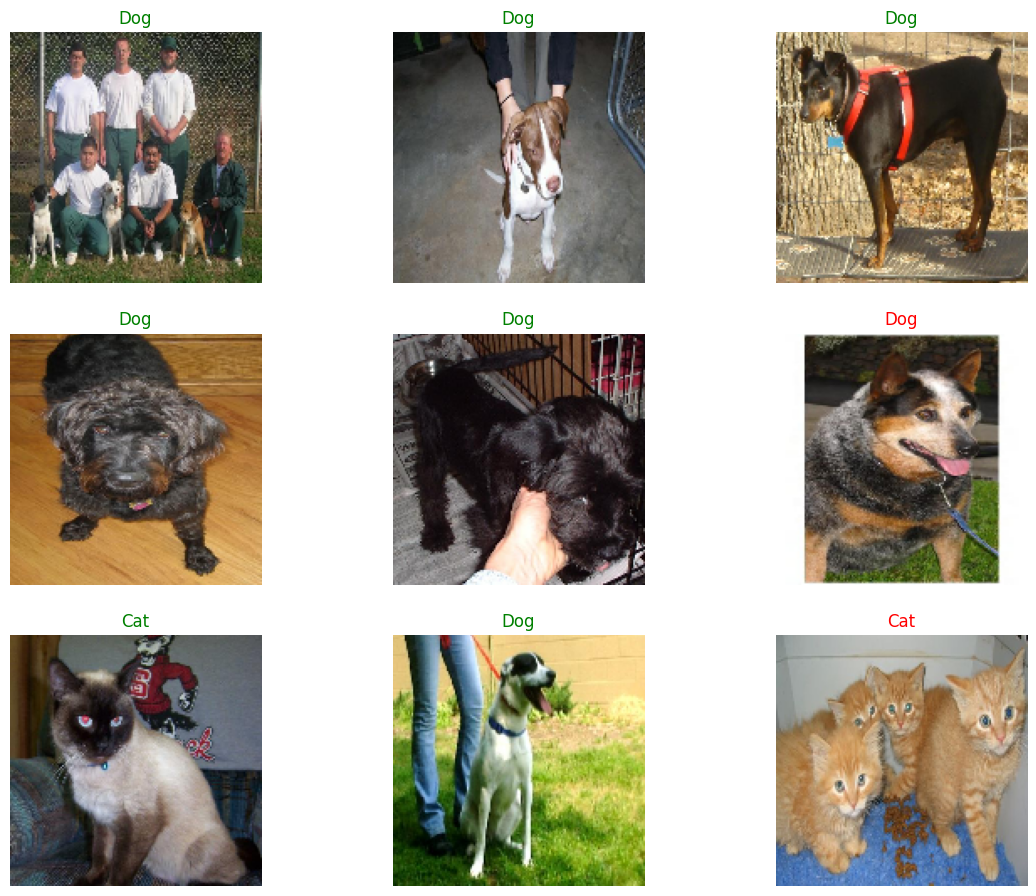

In [ ]:
if INCLUDE_TEST:
  plot_prediction(test_generator, 10)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step 


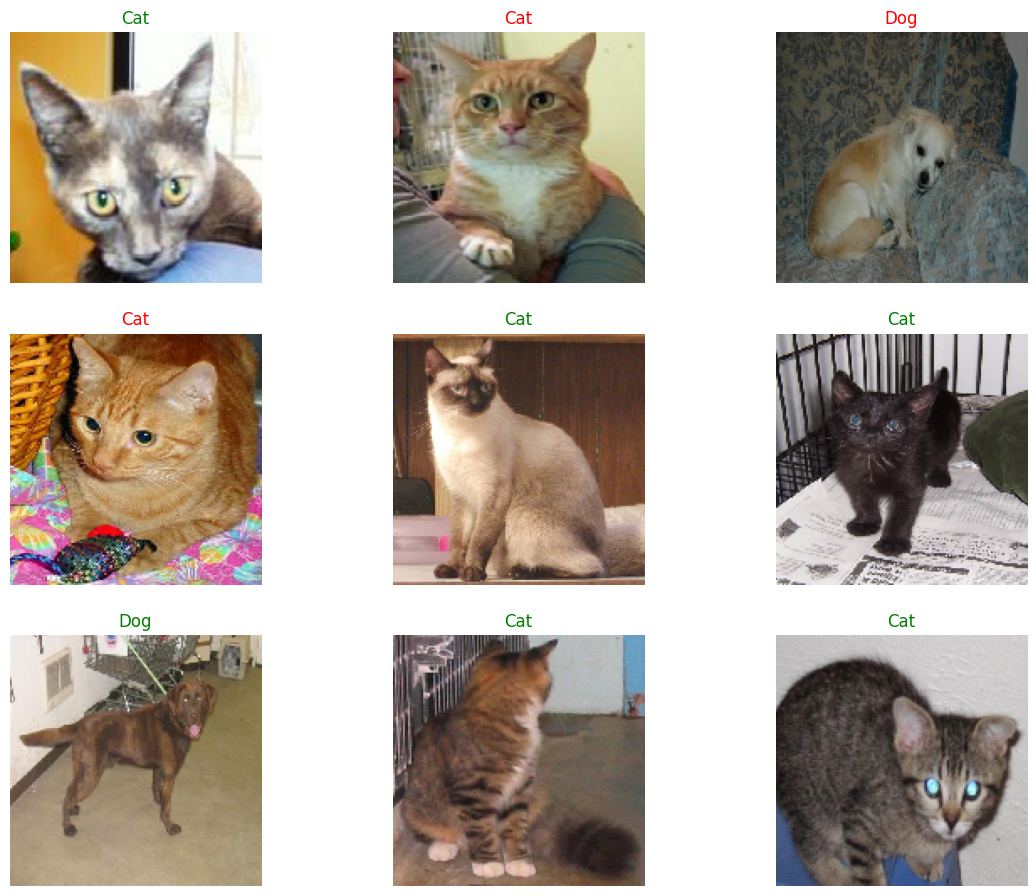

In [ ]:
plot_prediction(validation_generator, 10)

In [ ]:
gp_weights =  model.get_layer('dense').get_weights()[0]
activation_model = Model(model.inputs, outputs=(model.get_layer('conv2d_5').output, model.get_layer('dense_1').output))

In [ ]:
images, _ = next(test_generator)
features, results = activation_model.predict(images)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 150, 150, 3))



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step 


In [ ]:
def show_cam(image_index, features, results):
    features_for_img = features[image_index,:,:,:]

    prediction = np.argmax(results[image_index])

    class_activation_weights = gp_weights[:,prediction]

    class_activation_features = sp.ndimage.zoom(features_for_img, (150/30, 150/30, 1), order=2)

    cam_output  = np.dot(class_activation_features,class_activation_weights)

    print('Predicted Class = ' +str(class_names[prediction])+ ', Probability = ' + str(results[image_index][prediction]))


    plt.imshow(images[image_index])

    if results[image_index][prediction]>0.95:
        cmap_str = 'Greens'
    else:
        cmap_str = 'Blues'

    plt.imshow(cam_output, cmap=cmap_str, alpha=0.5)

    plt.show()

In [ ]:
def show_maps(desired_class, num_maps):
    '''
    goes through the first 10,000 test images and generates Cam activation maps
    Args:
    desired_class: class to show the maps for
    num_maps: number of maps to be generated
    '''
    counter = 0
    for i in range(0,10000):
        if counter == num_maps:
            break
        if np.argmax(results[i]) == desired_class:
            counter += 1
            show_cam(i,features, results)

Predicted Class = Dog, Probability = 0.9809186


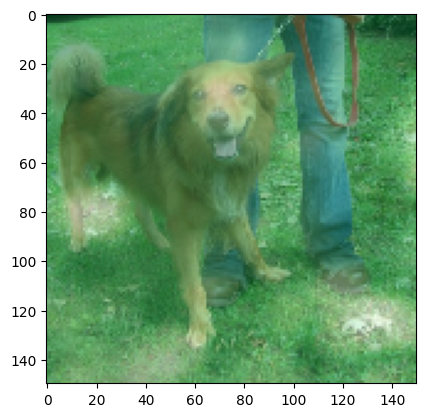

Predicted Class = Dog, Probability = 0.866062


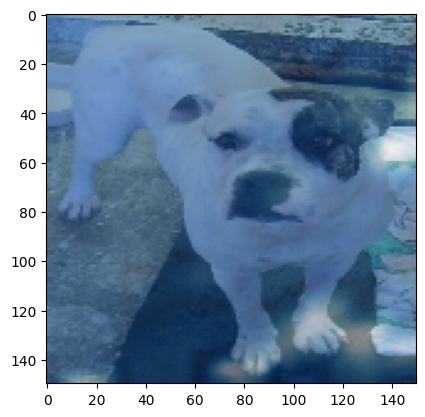

Predicted Class = Dog, Probability = 0.50533


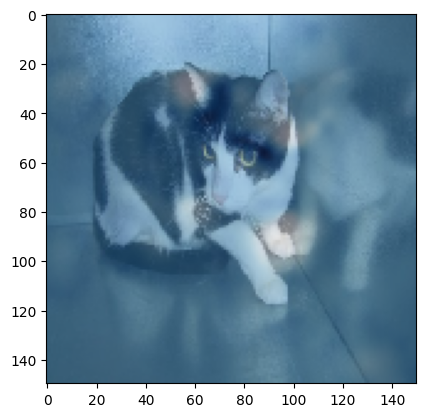

Predicted Class = Dog, Probability = 0.5790662


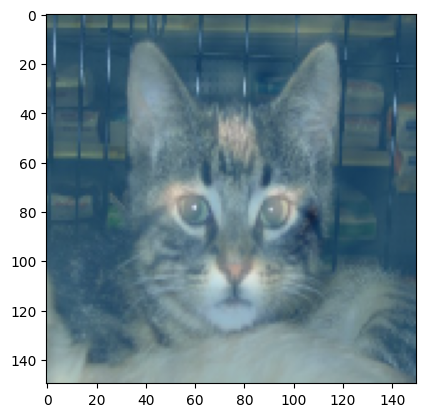

Predicted Class = Dog, Probability = 0.77833974


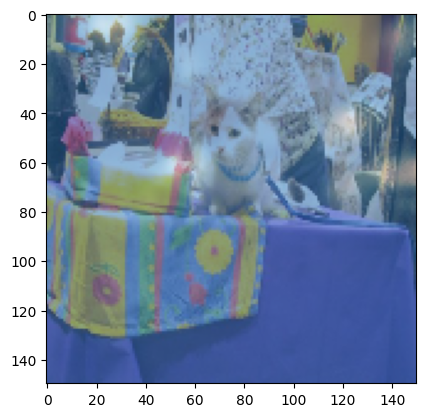

In [ ]:
show_maps(desired_class=1, num_maps=5)

Predicted Class = Cat, Probability = 0.8877204


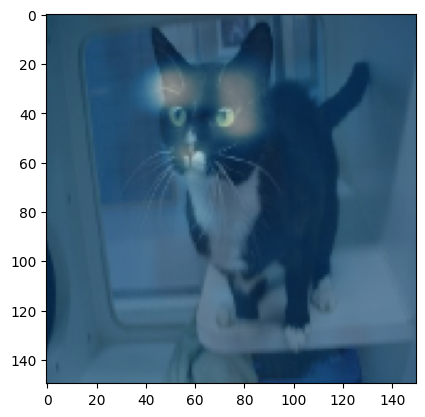

Predicted Class = Cat, Probability = 0.77349275


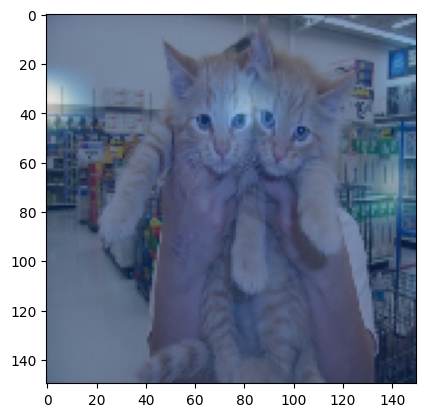

Predicted Class = Cat, Probability = 0.5200523


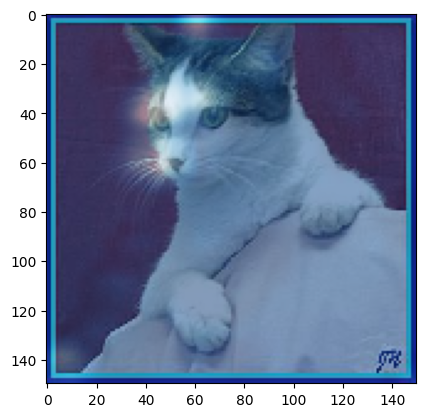

Predicted Class = Cat, Probability = 0.95083135


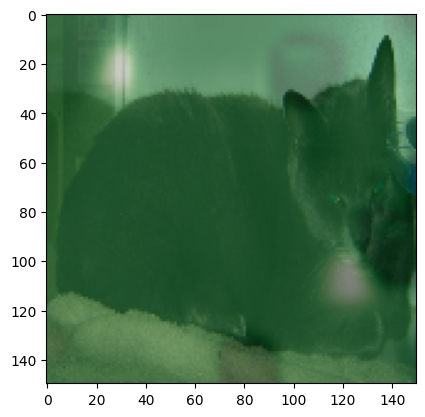

Predicted Class = Cat, Probability = 0.8938239


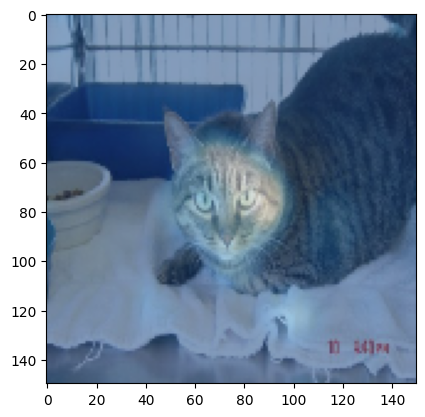

In [ ]:
show_maps(desired_class=0, num_maps=5)

In [ ]:
results = pd.DataFrame(r.history)
results.tail()

accuracy      loss  val_accuracy  val_loss
5  0.729366  0.540071        0.7688  0.494733
6  0.743500  0.524530        0.7696  0.484131
7  0.752300  0.510123        0.7960  0.444814
8  0.771323  0.484875        0.8136  0.430392
9  0.788480  0.459901        0.8008  0.421245

In [ ]:
fig = px.line(results,y=[results['accuracy'],results['val_accuracy']],template="seaborn",color_discrete_sequence=['#fad25a','red'])
fig.update_layout(
    title_font_color="#fad25a",
    xaxis=dict(color="#fad25a",title='Epochs'),
    yaxis=dict(color="#fad25a")
 )
fig.show()

In [ ]:
fig = px.line(results,y=[results['loss'],results['val_loss']],template="seaborn",color_discrete_sequence=['#fad25a','red'])
fig.update_layout(
    title_font_color="#fad25a",
    xaxis=dict(color="#fad25a",title='Epochs'),
    yaxis=dict(color="#fad25a")
 )
fig.show()

### Trying the Data Augmentation

In [ ]:
train_generator_aug = ImageDataGenerator(
        rescale=1./255,fill_mode='nearest',horizontal_flip=True,
        rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
)


validation_generator_aug =  ImageDataGenerator(
        rescale=1./255.)

In [ ]:
train_generator = train_generator_aug.flow_from_directory(
        '/content/microsoft-catsvsdogs-dataset/tmp/training',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = validation_generator_aug.flow_from_directory(
        '/content/microsoft-catsvsdogs-dataset/tmp/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 22499 images belonging to 2 classes.
Found 1250 images belonging to 2 classes.


In [ ]:
inputs = tf.keras.layers.Input(shape=(150,150,3))
x =  tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.Conv2D(256, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)


x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x)

model_aug = Model(inputs=inputs, outputs=x)

In [ ]:
model_aug.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
r = model_aug.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/10
259/704 ━━━━━━━━━━━━━━━━━━━━ 1:38 222ms/step - accuracy: 0.4926 - loss: 0.8325

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning:

Truncated File Read



704/704 ━━━━━━━━━━━━━━━━━━━━ 173s 231ms/step - accuracy: 0.5049 - loss: 0.7551 - val_accuracy: 0.5816 - val_loss: 0.6750
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 157s 223ms/step - accuracy: 0.5922 - loss: 0.6715 - val_accuracy: 0.6024 - val_loss: 0.6563
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 157s 222ms/step - accuracy: 0.6669 - loss: 0.6206 - val_accuracy: 0.7368 - val_loss: 0.5265
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 158s 224ms/step - accuracy: 0.7109 - loss: 0.5670 - val_accuracy: 0.7864 - val_loss: 0.4568
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 157s 223ms/step - accuracy: 0.7479 - loss: 0.5214 - val_accuracy: 0.7600 - val_loss: 0.5091
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 157s 222ms/step - accuracy: 0.7782 - loss: 0.4777 - val_accuracy: 0.8384 - val_loss: 0.3674
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 201s 221ms/step - accuracy: 0.8011 - loss: 0.4440 - val_accuracy: 0.8872 - val_loss: 0.2806
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 159s 226ms/step - accuracy: 0.8222 - loss: 0.39

In [ ]:
results = pd.DataFrame(r.history)
results.tail()

accuracy      loss  val_accuracy  val_loss
5  0.780968  0.473129        0.8384  0.367449
6  0.806747  0.433282        0.8872  0.280610
7  0.824081  0.401853        0.9000  0.265471
8  0.839593  0.375973        0.9128  0.217253
9  0.851727  0.353735        0.8760  0.329888

In [ ]:
fig = px.line(results,y=[results['accuracy'],results['val_accuracy']],template="seaborn",color_discrete_sequence=['#fad25a','red'])
fig.update_layout(
    title_font_color="#fad25a",
    xaxis=dict(color="#fad25a",title='Epochs'),
    yaxis=dict(color="#fad25a")
 )
fig.show()

In [ ]:
fig = px.line(results,y=[results['loss'],results['val_loss']],template="seaborn",color_discrete_sequence=['#fad25a','red'])
fig.update_layout(
    title_font_color="#fad25a",
    xaxis=dict(color="#fad25a",title='Epochs'),
    yaxis=dict(color="#fad25a")
 )
fig.show()